In [1]:
import csv
import re

In [18]:
f_sim_loaded = []
mag_sim_loaded = []
phase_sim_loaded = []
with open('zi_loaded.txt', encoding = 'unicode_escape') as csvfile:
    spamreader = csv.reader(csvfile, delimiter='\t')
    first = True
    for row in spamreader:
        if first:
            first = False
            continue
        f_sim_loaded.append(float(row[0]))
        p = re.compile(r'\((?P<magnitude>.*)dB,(?P<phase>.*)°\)')
        m = p.search(row[1])
        mag_sim_loaded.append(10**(float(m.group('magnitude'))/20)/1e3)
        phase_sim_loaded.append(float(m.group('phase')))

In [17]:
f_sim_OL = []
mag_sim_OL = []
phase_sim_OL = []
with open('zi_OL.txt', encoding = 'unicode_escape') as csvfile:
    spamreader = csv.reader(csvfile, delimiter='\t')
    first = True
    for row in spamreader:
        if first:
            first = False
            continue
        f_sim_OL.append(float(row[0]))
        p = re.compile(r'\((?P<magnitude>.*)dB,(?P<phase>.*)°\)')
        m = p.search(row[1])
        mag_sim_OL.append(10**(float(m.group('magnitude'))/20)/1e3)
        phase_sim_OL.append(float(m.group('phase')))

In [19]:
f_medicion_loaded = [
1,
10,
100,
1.00E+03,
1.00E+04,
5.00E+04,
1.00E+05,
2.00E+05
]
mag_medicion_loaded = [
74.94,
12.96,
11.675,
11.675,
11.632,
11.632,
11.075,
7.854
]

In [20]:
f_medicion_OL = [
1,
10,
100,
1.00E+03,
1.00E+04,
5.00E+04,
1.00E+05,
2.00E+05
]
mag_medicion_OL = [
78.07,
13.139,
12.14,
12.19,
12.19,
11.28,
10.01,
7.19
]

In [13]:
from matplotlib import pyplot as plt

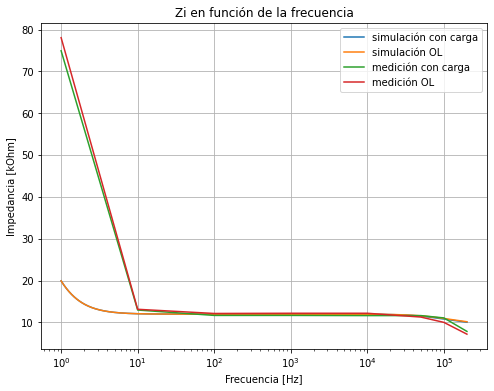

In [23]:
plt.figure(figsize=(8, 6))
plt.semilogx(f_sim_loaded, mag_sim_loaded, label='simulación con carga')    # Bode magnitude plot
plt.semilogx(f_sim_OL, mag_sim_OL, label='simulación OL')    # Bode magnitude plot
plt.semilogx(f_medicion_loaded, mag_medicion_loaded, label='medición con carga')    # Bode magnitude plot
plt.semilogx(f_medicion_OL, mag_medicion_OL, label='medición OL')    # Bode magnitude plot
plt.grid()
plt.title('Zi en función de la frecuencia')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Impedancia [kOhm]')
plt.legend()
plt.savefig('zi.png')

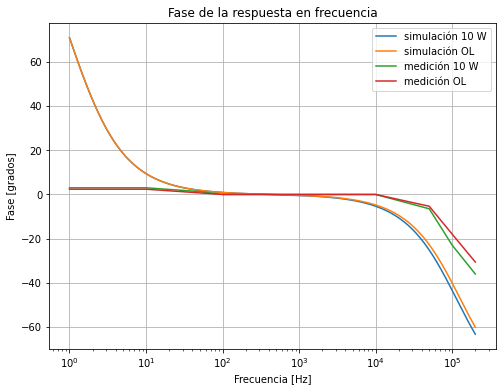

In [37]:
plt.figure(figsize=(8, 6))
plt.semilogx(f_sim_10w, phase_sim_10w, label='simulación 10 W')  # Bode phase plot
plt.semilogx(f_sim_OL, phase_sim_OL, label='simulación OL')  # Bode phase plot
plt.semilogx(f_medicion_10W, phase_medicion_10W, label='medición 10 W')  # Bode phase plot
plt.semilogx(f_medicion_OL, phase_medicion_OL, label='medición OL')  # Bode phase plot
plt.grid()
plt.title('Fase de la respuesta en frecuencia')
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('Fase [grados]')
plt.legend()
plt.savefig('bw_phase.png')